# Problème raide (stiff)

In [2]:
# import Pkg; Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
# import Pkg; Pkg.add("ODEInterfaceDiffEq")
using DifferentialEquations
using Plots
using ODEInterfaceDiffEq              # pour accéder à radau5
pyplot()
# gr()
# gr(dpi=300,size=(600,400),thickness_scaling=1)

Plots.PyPlotBackend()


## Exemple curtiss et Hirschfelder
Cet exemple provient du tome 2 du livre d'Hairer, page 2. Le problème de Cauchy est
$$(IVP)_2\left\{\begin{array}{l}
\dot{y}(t)=-50(y(t)-\cos(t))\\
y(0)=0
\end{array}\right.
$$
avec $[t_0\;\; t_f]=[0\;\; 1.5]$.

On demande de résoudre numériquement ce problème avec les algorithmes : 
- d'Euler explicite, alg = Euler(), et avec un pas de 1.974/50 et un pas de 1.875/50 (option dt). On prendra aussi comme option dense = false afin de n'avoir que les points aux instant $t_i$.
- d'Euler implicite, algo = ImplicitEuler(), avec un pas de 0.5. On prendra aussi comme options dense = false et adaptive = false afin de n'avoir que les points aux instant $t_i$.



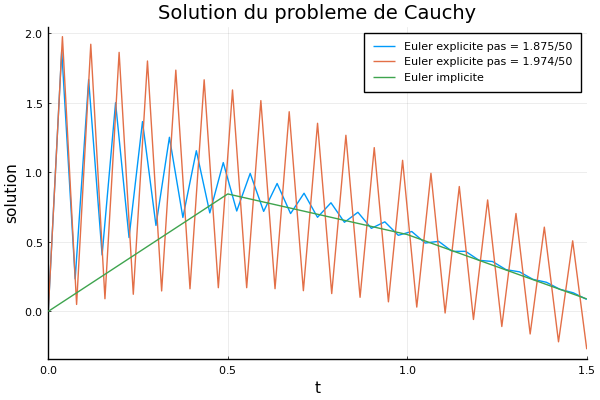

In [11]:
function curtiss(x,p,t)
# deuxieme membre de l'equation differentiel de l'equation de Curtiss et Hirschfelder
# ref: Hairer page 2 tome 2
# Input
# x : state
#     real(2)
# p : parameter vector
# t : time
#     real
# Output
# xpoint : vector of velocity
#          same as x
    xpoint    = similar(x)
    xpoint[1] = -50*(x[1]-cos(t))
    return xpoint
end

x0 = [0.];
t0 = 0.;
tf = 1.5;
p = [1.]
tspan = (t0,tf)
prob = ODEProblem(curtiss,x0,tspan,p)

##Euler explicite
sol_Euler_explicite = solve(prob, Euler(), dt = 1.875/50, dense = false)     # réalise l'intégration numérique
p1 = plot(sol_Euler_explicite, xlabel = "t", ylabel = "solution", label = "Euler explicite pas = 1.875/50")

##Euler explicite 2
sol_Euler_explicite2 = solve(prob, Euler(), dt = 1.974/50, dense = false)     # réalise l'intégration numérique
p2 = plot!(sol_Euler_explicite2, xlabel = "t", ylabel = "solution", label = "Euler explicite pas = 1.974/50")


##Euler implicite
sol_Euler_implicite = solve(prob, ImplicitEuler(), dt = 0.5, dense = false, adaptive= false)     # réalise l'intégration numérique
p3 = plot!(sol_Euler_implicite, xlabel = "t", ylabel = "solution", label = "Euler implicite", title = "Solution du probleme de Cauchy")




### Exemple de Roberston
On considère la réaction chimique 
$$\begin{array}{cccl}
A & \stackrel{0.04}{\longrightarrow} & B & \textrm{(lente)},\\
B+B & \stackrel{3.10^7}{\longrightarrow} & C+B & \textrm{(très rapide)},\\
B+C & \stackrel{10^4}{\longrightarrow} & A+C & \textrm{(rapide)}.\\
\end{array}
$$
Le système différentiel associé à cette réaction chimique est donnée par
$$(IVP)\left\{\begin{array}{lrr}
\dot{x}_1(t)= &-0.04x_1(t)+10^4x_2(t)x_3(t) &\\
\dot{x}_2(t)= & 0.04x_1(t)-10^4x_2(t)x_3(t) &-3.10^7x_2^2(t)\\
\dot{x}_3(t)= &                             & 3.10^7x_2^2(t)\\
x_1(0)=1,
x_2(0)=0,
x_3(0)=0.
\end{array}\right.
$$
avec $[t_0\;\; t_f]=[0\;\; 0.3]$.

On demande de résoudre numériquement ce problème avec les algorithmes : 
- algo = DP5() (Dormand-Prince's 5/4 Runge-Kutta method, algorithme utilisé dans ode45 de matlab et dopri5 du Professeur Hairer) et les options reltol = 1e-2, abstol = 1.e-6, dense = false
- algo = DP5() (Dormand-Prince's 5/4 Runge-Kutta method, algorithme utilisé dans ode45 de matlab et dopri5 du Professeur Hairer) et les options reltol = 1e-3, abstol = 1.e-6, dense = false, dense = false
- algo = radau5() : pragramme Radau5 du Professeur Hairer pour les problème raides.

Et d'afficher sur le même graphique la deuxième composante




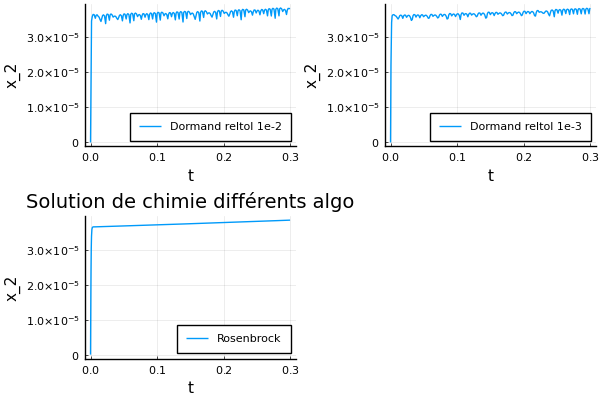

In [10]:
function chimie(x,p,t)
# deuxieme membre de l'equation differentiel de l'equation de Robertson (1966)
# ref: Hairer page 3 tome 2
# Input
# x : state
#     real(2)
# p : parameter vector
# t : time
#     real
# Output
# xpoint : vector of velocity
#          same as x
    xpoint    = similar(x)
    xpoint[1] = -0.04*x[1]+10^4*x[2]*x[3]
    xpoint[2] = 0.04*x[1]+10^4*x[2]*x[3] - 3*10^7*((x[2])^2)
    xpoint[3] =  3*10^7*((x[2])^2)
    return xpoint
end

x0 = [1., 0., 0.];
t0 = 0.;
tf = 0.3;
p = []
tspan = (t0,tf)
xpoint = similar(x0)
prob2 = ODEProblem(chimie,x0,tspan,p)


##Dormand-Prince's 
sol_Dormand = solve(prob2, DP5(), reltol = 1e-2, abstol = 1.e-6 ,dense = false)     # réalise l'intégration numérique
p3 = plot(sol_Dormand.t, sol_Dormand[2,:], xlabel = "t", ylabel = "x_2", label = "Dormand reltol 1e-2")

##Dormand-Prince's 2ème version
sol_Dormand2 = solve(prob2, DP5(), reltol = 1e-3, abstol = 1.e-6 ,dense = false)     # réalise l'intégration numérique
p4 = plot(sol_Dormand2.t, sol_Dormand2[2,:], xlabel = "t", ylabel = "x_2", label = "Dormand reltol 1e-3")

#Radau5
sol_Dormand3 = solve(prob2, Rosenbrock23())     # réalise l'intégration numérique
p5 = plot(sol_Dormand3.t, sol_Dormand3[2,:], xlabel = "t", ylabel = "x_2",  label = "Rosenbrock", title = "Solution de chimie différents algo")

plot(p3, p4, p5, legend=:bottomright)